Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Loading Dataset

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,Age,Insurance_Premium
0,56,9572.91
1,69,10263.83
2,46,7934.08
3,32,6344.95
4,60,8951.57


## EDA

In [4]:
df.shape

(1200, 2)

In [5]:
df.describe()

,Age,Insurance_Premium
count,1200.000000,1200.000000
mean,43.627500,7258.682983
std,15.052881,1873.202378
min,18.000000,3058.420000
25%,31.000000,5623.270000
50%,44.000000,7298.060000
75%,56.000000,8817.680000
max,69.000000,11456.790000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1200 non-null   int64  
 1   Insurance_Premium  1200 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 18.9 KB


In [7]:
df.isnull().sum()

Age                  0
Insurance_Premium    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

Split Dataset

In [9]:
X = df[["Age"]]
y = df["Insurance_Premium"]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((840, 1), (360, 1), (840,), (360,))

Visualizing [Age Vs Insurance Premium]

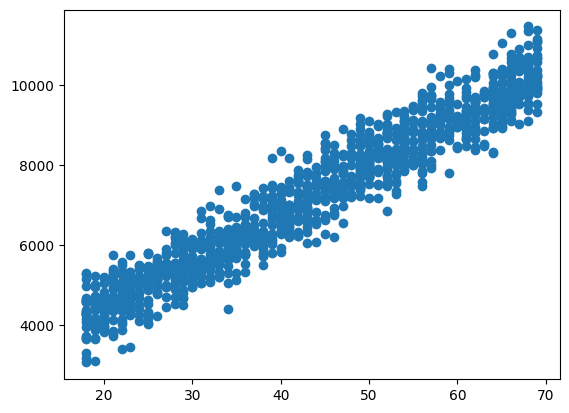

In [11]:
plt.scatter(X,y)

Scaling Value Of X

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training The Model

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Visualizing [Age vs Predicted Insurance premium]

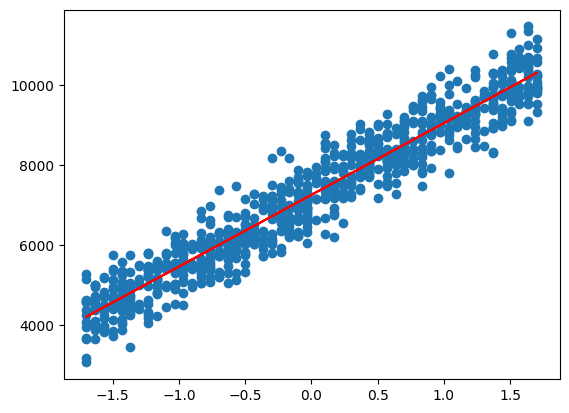

In [15]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),'r')


Checking Slope And Interception

In [16]:
print("The Slope (m) : ",model.coef_[0])
print("The Interception (c) : ",model.intercept_)

The Slope (m) :  1792.2686252884007
The Interception (c) :  7248.901214285715


Testing The Model

In [17]:
y_pred = model.predict(X_test)
y_pred

array([ 7071.15062657,  9344.30718098,  4199.7949789 , 10181.78591155,
        4917.63389082,  4199.7949789 ,  8267.5488131 ,  8267.5488131 ,
        9105.02754367,  7430.07008253,  8147.90899445,  6592.59135196,
        7071.15062657,  4558.71443486,  7908.62935714,  7549.70990118,
        5994.3922587 ,  5037.27370947,  5276.55334678,  7190.79044523,
        8267.5488131 ,  8267.5488131 ,  5276.55334678,  6114.03207735,
        6951.51080792,  8865.74790637,  9344.30718098,  5276.55334678,
        7310.43026388,  7549.70990118, 10301.4257302 ,  8626.46826906,
        8626.46826906,  4439.07461621,  7669.34971984,  9463.94699963,
        6951.51080792,  4797.99407217,  9822.86645559,  8267.5488131 ,
        7788.98953849,  9344.30718098,  4797.99407217,  9463.94699963,
        8985.38772502,  4917.63389082,  8626.46826906,  4319.43479756,
        4917.63389082,  4558.71443486,  7908.62935714, 10062.14609289,
        4678.35425352,  7669.34971984,  4319.43479756,  8985.38772502,
      

In [18]:
y_test

1178     7001.23
865      8461.25
101      4672.14
439     10335.88
58       4960.68
          ...   
47       5835.26
318      8644.53
106      3305.75
798      7272.52
55       5966.23
Name: Insurance_Premium, Length: 360, dtype: float64

Performance Of The Model

In [19]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae,mse,rmse

(401.7097622954139, 262192.5254546449, np.float64(512.047385946501))

Accuracy Of The Model

In [20]:
score = r2_score(y_test,y_pred)
score

0.9266684805985687

### Predicting Insurance Premium Based On Your Age

In [24]:
age = float(input("Enter Your Age : "))
prediction = model.predict(scaler.transform([[age]]))
print(f"You Age Is {age} , So Your Predicted Insurance Premium would Be {round(prediction[0],2)}")

You Age Is 22.4 , So Your Predicted Insurance Premium would Be 4726.21


c:\Users\asus2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
